In [10]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import sys
sys.path.append("..")
import fastcat as fc

In [3]:
#photozs that we have
pzs=[]
pzs.append(("Gauss",fc.photoz.PhotoZGauss(0.02)))
pzs.append(("TwoPop",fc.photoz.PhotoZTwoPop(0.02,0.75,3.)))
pzs.append(("HiddenVar",fc.photoz.PhotoZHiddenVar(0.02,[0.1,0.2],[0.6,0.65])))
pzs.append(("Franzona",fc.photoz.PhotoZHist("/project/projectdirs/lsst/LSSWG/Franzona/pzdist.txt")))

filepath= /project/projectdirs/lsst/LSSWG/Franzona/pzdist.txt options= None
Reading file...
Creating pickled version of Franzona file!
done...


/home/anze/work/LSST/fastcat/fastcat/photoz_Hist.py:68: RuntimeWarning: invalid value encountered in divide
  self.dataset[:, 3:] = (np.where(integrals!=0., self.dataset[:, 3:].T/integrals, 0.)).T


In [4]:
ztrues=np.array([0.1,0.4,0.62,0.8,1.0])
zar=np.linspace(0,1.4,1000)

Applying PZs
[(0.07640533149242401, 0.02199999988079071)]
Applying PZs
[(-0.01949695125222206, 0.08799999952316284)]
Applying Hidden Var PZs
[(2.7452712059020996, 2.7255080904572737)]
[(0.10000000149011612, 2, 2, 79)]
Applying PZs
[(0.3543088138103485, 0.0279999990016222)]
Applying PZs
[(0.42236971855163574, 0.1119999960064888)]
Applying Hidden Var PZs
[(10.811659812927246, 12.967021853531254)]
[(0.4000000059604645, 8, 2, 61)]
Applying PZs
[(0.5999819040298462, 0.03240000084042549)]
Applying PZs
[(0.4168950021266937, 0.12960000336170197)]
Applying Hidden Var PZs
[(-1.0234755277633667, 16.345447993099654)]
[(0.6200000047683716, 12, 1, 63)]
Applying PZs
[(0.8109675645828247, 0.035999998450279236)]
Applying PZs
[(0.6296088099479675, 0.14399999380111694)]
Applying Hidden Var PZs
[(1.8377810716629028, 4.590444356256673)]
[(0.800000011920929, 16, 0, 100)]


/home/anze/local/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in divide


Applying PZs
[(0.9734340906143188, 0.03999999910593033)]
Applying PZs
[(0.9603346586227417, 0.1599999964237213)]
Applying Hidden Var PZs
[(6.103626251220703, 9.218267856626928)]
[(1.0, 19, 2, 89)]


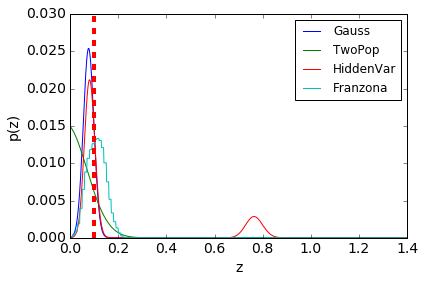

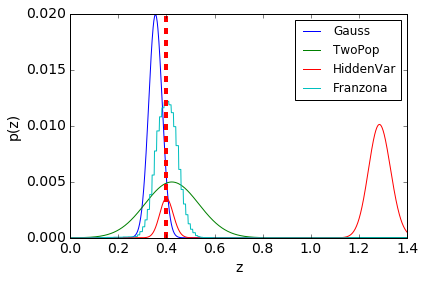

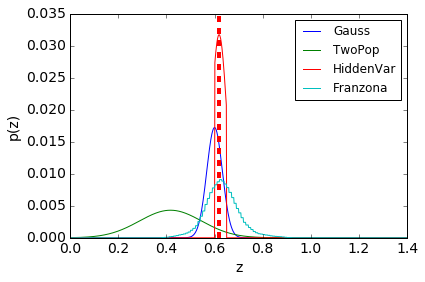

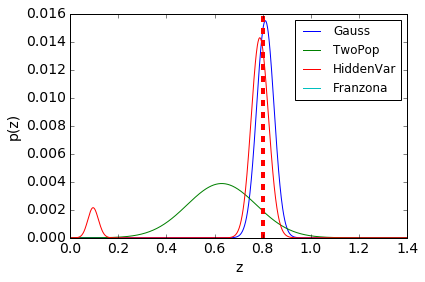

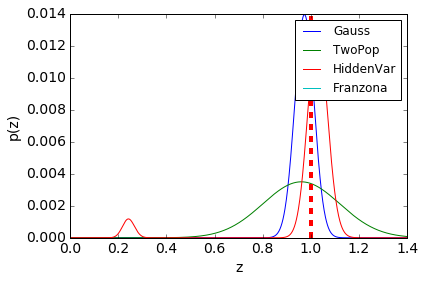

In [16]:
matplotlib.rc('xtick', labelsize=14)
matplotlib.rc('ytick', labelsize=14)
for ztrue in ztrues:
    plt.figure(figsize=(6,4))
    for name,pz in pzs:
        arr=np.array(np.array([ztrue]),dtype=[('z',np.float32)])
        arr=pz.applyPhotoZ(arr)
        print arr
        p=np.array([pz.PofZ(arr,float(z),0.1) for z in zar])
        p/=p.sum()
        plt.plot(zar,p,label=name)
    plt.legend()
    ymin,ymax=plt.ylim()
    plt.plot([ztrue,ztrue],[ymin,ymax],'r--',lw=4)
    plt.ylim(ymin,ymax)
    plt.xlabel("z",fontsize=14)
    plt.ylabel("p(z)",fontsize=14)
    plt.tight_layout()
    plt.savefig ('ptest'+str(ztrue)+'.pdf')
    